In [1]:
# 3. Sampling, estimation and Central Limit Theorem


# Introduction to Inferential Statistics ( giới thiệu về thống kê suy luận 
1. Inferential Statistics
2. Sampling Techniques
a. Convenience Sampling
b. Systematic Sampling
c. Simple Random Sampling
d. Stratified Sampling
e. Cluster Sampling
3. Population Parameter vs Sample Statistic
4. How to perform Estimations/Approximations/Inference?
5. Sampling in Pandas DataFrame
6. Point Estimate using 1 Sample
7. How large a sample should be?
8. Central Limit Theorem
9. Point Estimate using m Sample
10. Confidance Interval Estimates using 1 Sample (if Population Std is known)
11. Confidance Interval Estimates using 1 Sample (if Population Std is unknown)

### The Goal is to leverage data in real time to make informed decisions, optimize processes and enhance overall business performance

# Samlping Techniques
1. Convenience Sampling ( lấy mẫu thuận tiện )
- Chọn đối tượng dễ tiếp cận nhất
- ưu điểm nhanh rẻ
- ví dụ hỉ người đang đi trung tâm thương mại
2. Systematic Sampling ( lấy mẫu hệ thống )
- Chọn đối tượn theo khoảng cách cố định trong danh sách xắp xếp
- ví dụ chọn 5 người 1 lần
3. Simple Random Sampling(SRS) - Lấy mẫu ngẫu nhiên đơn giản
- mọi đối tượng có cơ hội ngang nhau
- ví dụ chọn ran dom 50 trong từng đó người
4. Stratified Sampling - Lấy mẫu phân tầng
- Chia tổng thể thành các nhóm dựa trên đặc điểm chung, rồi lấy mẫu ngẫu nhiên từ mỗi nhóm tỷ lệ
- ví dụ chia dân số thành nhóm tuổi và lấy mẫu theo từng tỉ lệ nhóm
5. Cluster Sampling – Lấy mẫu cụm
- Chia tổng thể thành các cụm, chọn ngẫu nhiên một số cụm, rồi khảo sát toàn bộ thành viên trong cụm đó.
- ví dụ chọn 3 tronwgf học ngẫu nhiên rồi khảo sát toàn bọ học sinh trong các trưởng đó

# Population Paramater and Sample Statistics
1. Population Mean (μ) and Sample Mean (x̄):
- Population Mean
- Sample Mean
2. Population Variance (σ²) and Sample Variance (s²):
- Population Variance:
- Sample Variance
3. Population Standard Deviation (σ) and Sample Standard Deviation (s):
- Population Standard Deviation (σ):
- Sample Standard Deviation (s)

# How to Perform Estimations / Approximations / inference
1. Take a Sample. Uniformly at random try to take a large enough sample from population such that the sample is a correct representation of the entire population.
2. Caculate the Sample statistics ( tinsh toán số liệu thống kê)
3. Estimate the Population Parameter using the Sample Statistics. There are various estimation techniques like Point Estimate, Confidence Interval Estimate, Maximum Likelyhood Estimation, GMM's, etc...

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [3]:
population_df = pd.read_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/adult.csv")

population_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
population_df.shape

(48842, 15)

In [5]:
population_df.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
population_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:


population_df['age'].value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

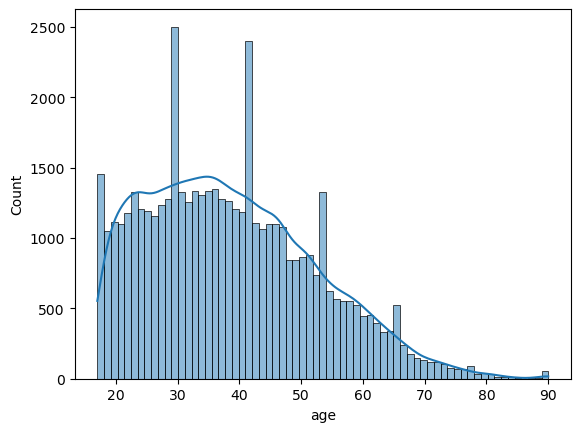

In [8]:

sns.histplot(population_df['age'], kde = True)

## Sampling in Pandas DataFrame

In [9]:
# Way 1 - Use frac to mention the fraction of data that you want to randomly sample

population_df.sample(frac = 0.1, random_state = 42)
# frac là 0.1 = 10 % của số hàng trong df nếu có 100 hàng thì lọc ra 10 hàng 
# random_state hiểu đơn giản giống random nhưng tôi chỉ muốn 1 kết quả nên tôi dùng nó để
# có định giống np.random.seed(42)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7762,56,Private,33115,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
23881,25,Private,112847,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States,<=50K
30507,43,Private,170525,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,>50K
28911,32,Private,186788,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
19484,39,Private,277886,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43114,62,Local-gov,208266,Assoc-voc,11,Divorced,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
5042,45,Private,256866,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
7027,25,Local-gov,170070,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
36588,47,Self-emp-not-inc,26145,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K


In [15]:
# Way 2 - Use n to mention the number of datapoints that you want to randomly sample

population_df.sample(n=100, random_state=42)
# không cần dùng frac lấy luôn số hàng là n = 100 hàng

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7762,56,Private,33115,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
23881,25,Private,112847,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States,<=50K
30507,43,Private,170525,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,>50K
28911,32,Private,186788,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
19484,39,Private,277886,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,30,Private,267281,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
32845,30,Private,272669,Some-college,10,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,40,United-States,<=50K
36853,35,Private,202027,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,7298,0,35,United-States,>50K
28697,57,Private,279636,Assoc-voc,11,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,>50K


## Point Estimate using 1 Sample
- Point estimation involves using a single value (a point) from the sample data to estimate the population parameter. For example, using the sample mean to estimate the population mean. ( kiểu như lấy trung bình mẫu để tính trung bình dân)
- Step 1: Take a large enough uniform random sample of size n.
- Step 2: Caculate the Sample Statistics
- Step 3: Estimate the Population Paramater using the Sample Statistics

In [10]:
# Step 1 - Uniformly at random take a large enough sample from population

sample_df = population_df.sample(frac = 0.2, random_state = 42)
sample_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7762,56,Private,33115,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
23881,25,Private,112847,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States,<=50K
30507,43,Private,170525,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,>50K
28911,32,Private,186788,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
19484,39,Private,277886,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,23,Private,285775,HS-grad,9,Never-married,Protective-serv,Other-relative,White,Male,0,0,42,United-States,<=50K
43046,50,Local-gov,100480,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
18798,51,Private,106728,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,60,United-States,>50K
29519,25,Local-gov,167835,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,38,United-States,>50K


In [11]:
sample_df.shape

(9768, 15)

In [12]:
# Step 2 - Caculate the Sample Statistics ( Calculate mean())

sample_df['age'].mean()

38.7273751023751

In [13]:
# # Step 3 - Estimate the Population paramater using the Sample Statistics

## Compare population_df['age'].mean() ss sample_df['age'].mean()
print("Population Mean (i.e. Parameter):", population_df['age'].mean())
print("Sample Mean (i.e. Statistics):", sample_df['age'].mean())

print()
print("R E S U L T")
print(f"Population mean is estimated to be approximately equal to {sample_df['age'].mean()}.")


Population Mean (i.e. Parameter): 38.64358543876172
Sample Mean (i.e. Statistics): 38.7273751023751

R E S U L T
Population mean is estimated to be approximately equal to 38.7273751023751.


## How Large a sample Should be ?


In [14]:
sample_mean = []

for sample_size in np.arange(1, 1000):
    # lấy size sample từ 1 - > 999:
    sample_df = population_df.sample(n = sample_size)
    sample_mean.append((sample_size, sample_df['age'].mean()))


sample_means_df = pd.DataFrame(sample_mean, columns = ['n', 'mean'])

sample_means_df.head(15)

,n,mean
0,1,30.000000
1,2,36.000000
2,3,32.666667
3,4,41.750000
4,5,30.000000
5,6,39.666667
6,7,43.857143
7,8,45.125000
8,9,31.000000
9,10,36.800000


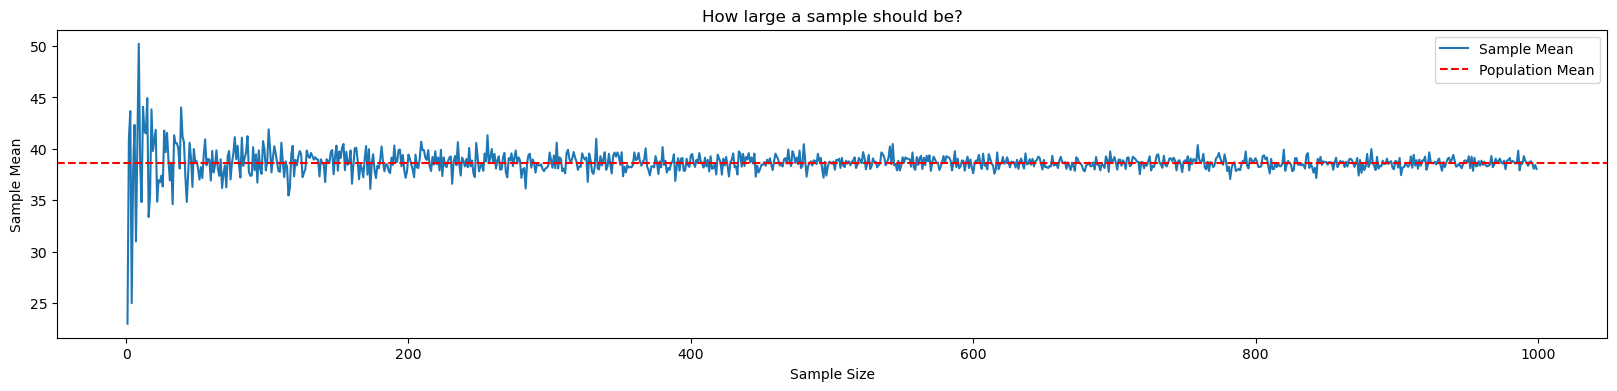

In [25]:
fig, ax = plt.subplots(figsize = (20, 4))
ax.set_title("How large a sample should be?")  # Add a title to the axes
ax.set_xlabel('Sample Size')  # Add an x-label to the axes
ax.set_ylabel('Sample Mean')  # Add a y-label to the axes

sns.lineplot(data = sample_means_df, x = "n", y = "mean", label = "Sample Mean")

ax.axhline(population_df['age'].mean(), ls = "--", color = 'red', label = "Population Mean")

ax.legend()

In [24]:
# ax.axhline dùng để tạo vạch kẻ ngang từ vị trí data = 


In [27]:
# Step 1: Take a sample ( Large enough)

sample_df = population_df.sample(n = 200, random_state = 0)

In [28]:
# Step 2: Calculate sample Statistic
sample_df['age'].mean()

38.94

In [29]:
# Step 3: Pop Mean approx equal to Sample statistic

# # As we have a complete population data - 
# # Let's check what is the actual population parameter.

print("Population Mean (i.e. Parameter):", population_df['age'].mean())
print("Sample Mean (i.e. Statistics):", sample_df['age'].mean())

print()
print("R E S U L T")
print(f"Population mean is estimated to be approximately equal to {sample_df['age'].mean()}.")

Population Mean (i.e. Parameter): 38.64358543876172
Sample Mean (i.e. Statistics): 38.94

R E S U L T
Population mean is estimated to be approximately equal to 38.94.


## Central Limit Theorem - CLT 
- Khi bạn lấy nhiều mẫu ngẫn nhiên từ 1 tổng thể với kích thước mẫu đủ lớn ( thưởng >= 30 ) phân phối của giá trị trung bình mẫu sẽ xấp xỉ phân phổi chuẩn ( normal distribution) bất kể tổng thể gốc có phân phối ntn
- gần như chuẩn khi kích thước mẫu đủ lơn
- mean = mean của tổng thể
- có độ lệch chuẩn = độ lệch chuẩn của df / căn n
- điều kiện kích thước mẫu >= 30
- phải ngẫu nhiên và độc lập

In [15]:
def sampling_distribution(data, sample_size, number_of_sample):
    sample_means = []
    for m in range(number_of_sample):
        sample = data.sample(n = sample_size)
        sample_means.append((sample_size, sample.mean()))

    sampling_distribution_df = pd.DataFrame(sample_means, columns = ['n', 'mean'])

    print("*" * 20, " REPORT ", "*" * 20)
    print("Mean Check")
    print("Sampling Distribution Mean : ", sampling_distribution_df['mean'].mean())
    print("Population Mean: ", data.mean())

    # Standard Deviation
    print()
    print("Standard Deviation Check")
    print("Sampling Distribution Std:", sampling_distribution_df["mean"].std())
    print("Population Std / (sample_size)**0.5:", data.std()/np.sqrt(sample_size))

    print("*"*55)
    
    return sampling_distribution_df

In [16]:
def sampling_distribution_plot(data):
    fig, axes = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
    
    axes[0].set_title("Sampling Distribution")  # Add a title to the axes
    axes[0].set_xlabel('Mean')  # Add an x-label to the axes
    axes[0].set_ylabel('Density')  # Add a y-label to the axes

    sns.histplot(data, kde=True, ax=axes[0])
    
    stats.probplot(data, dist=stats.norm, plot=axes[1])
    axes[1].grid()
    
    plt.show()

In [17]:
n = 50
m = 100
sampling_distribution_df = sampling_distribution(data = population_df['age'], sample_size = 50, number_of_sample = m)
sampling_distribution_df.head(12)

********************  REPORT  ********************
Mean Check
Sampling Distribution Mean :  38.8592
Population Mean:  38.64358543876172

Standard Deviation Check
Sampling Distribution Std: 1.6564826310802987
Population Std / (sample_size)**0.5: 1.9389589096340656
*******************************************************


,n,mean
0,50,39.34
1,50,38.76
2,50,36.70
3,50,39.48
4,50,39.14
5,50,37.56
6,50,39.22
7,50,41.96
8,50,37.60
9,50,37.90


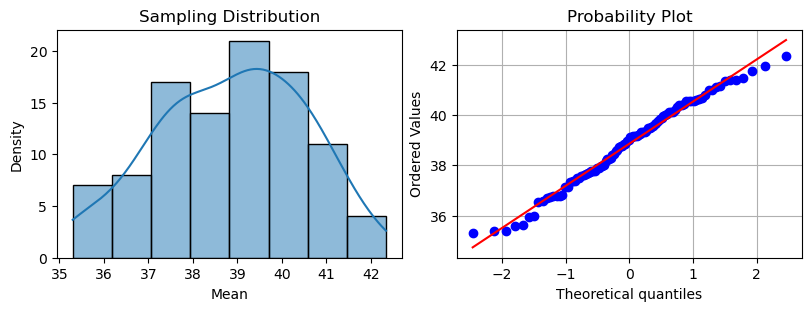

In [18]:
# vẽ probplot theo stats 
sampling_distribution_plot(data=sampling_distribution_df["mean"])

## Point Estimate using m Sample

- According to Central Limit Theorem, the sampling distribution of the sample mean will have a mean that is equal the population mean
- Step 1 : Take m different large enough uniform random sample of size n
- Step 2 - Calculate the sample statistics for each sample: Xi = sum(data) / n
- Step 3 - According to Central Limit Theorem
a. You will get a Sampling Distribution of Sample Mean: X = [X1, X2, Xm]
b. Calculate the Mean of Sampling Distribution: mean(X) = sum(X) / m
c . As per CLT we know that mean(X) approximate mean(Pop)
- Step 4 - Estimate the Population Parameter using the Mean of Sample statistics mean(pop) approximate mean(X)

********************  REPORT  ********************
Mean Check
Sampling Distribution Mean :  38.62146
Population Mean:  38.64358543876172

Standard Deviation Check
Sampling Distribution Std: 1.8903063048951416
Population Std / (sample_size)**0.5: 1.9389589096340656
*******************************************************


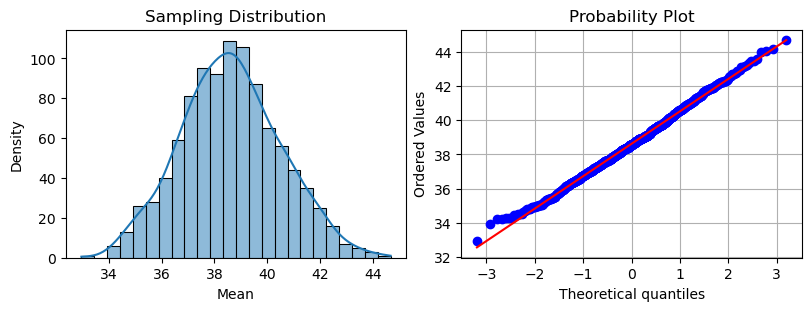

In [20]:
n = 50
m = 1000

sampling_distribution_df = sampling_distribution(data = population_df['age'], sample_size = n, number_of_sample=m)

sampling_distribution_plot(data = sampling_distribution_df["mean"])


In [21]:

print()
print("R E S U L T")
print(f"Population mean is estimated to be approximately equal to {sampling_distribution_df['mean'].mean()}.")


R E S U L T
Population mean is estimated to be approximately equal to 38.62146.
